# Data Preprocessing

Import Libraries


In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

Function to Visualise Confusion Matrix

In [2]:
def visualiseConfusionMatrix(cnf_mat, header):
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_labels = ['DF', 'F2F', 'FS', 'NT']
    sns.heatmap(cnf_mat, annot=True, cmap='Greens', fmt='d', annot_kws={"size": 20, "weight": "bold"}, xticklabels=class_labels, yticklabels=class_labels, linewidths=.05, linecolor="black")
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    for i in range(4):
        for j in range(4):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="black"))

    plt.title(header)
    name = 'DCT_' + header + '.png'
    plt.savefig(name)
    files.download(name)

    plt.show()

Load the Dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Project/CSVs/Features_dct.csv')
X = dataset.iloc[ : , 2 : ].values
y = dataset.iloc[ : , 0 ].values
print(X)
print(y)

[[ 1.45129248e+04  4.50882950e+01 -2.94815942e+03 ...  3.26365018e+00
   4.71095562e-01  6.63954401e+00]
 [ 1.45121846e+04  4.53320503e+01 -2.94816357e+03 ...  3.21865654e+00
   5.57059705e-01  6.80633354e+00]
 [ 1.45124717e+04  4.52661934e+01 -2.94810205e+03 ...  3.19641399e+00
   6.32812619e-01  6.70384932e+00]
 ...
 [ 1.08582764e+04 -6.52273682e+02  1.19264368e+03 ...  1.51210766e+01
   7.77800226e+00 -5.97023058e+00]
 [ 1.08231084e+04 -6.29749695e+02  1.19347949e+03 ...  1.80613461e+01
   5.04681587e+00 -9.37911034e+00]
 [ 1.08600107e+04 -6.35063293e+02  1.17449023e+03 ...  1.19554052e+01
   8.64362049e+00 -6.65711117e+00]]
['Deepfakes' 'Deepfakes' 'Deepfakes' ... 'NeuralTextures' 'NeuralTextures'
 'NeuralTextures']


Split the dataset into training set and test set.

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

Initialise the 5-Fold Cross Validation

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Support Vector Machine

Predict on Test Set.

In [6]:
poly_accuracy, rbf_accuracy = 0, 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly = svm.SVC(kernel='poly', degree=8, C=1).fit(X_train, y_train)
    rbf = svm.SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)
    
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    
    poly_accuracy += accuracy_score(y_test, poly_pred)
    rbf_accuracy += accuracy_score(y_test, rbf_pred)


Outcomes.

Accuracy (Polynomial Kernel):  26.08 %
Accuracy (RBF Kernel):  22.08 %
F1 score (Polynomial Kernel):  21.37
F1 score (RBF Kernel):  8.10
Confusion Matrix (Polynomial Kernel): 
 [[51  5 15  0]
 [48 11  7 11]
 [64  2 13  0]
 [57 19  9  7]]
Confusion Matrix (RBF Kernel): 
 [[71  0  0  0]
 [77  0  0  0]
 [79  0  0  0]
 [92  0  0  0]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

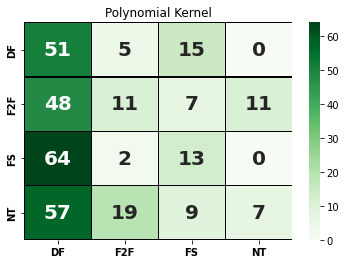

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

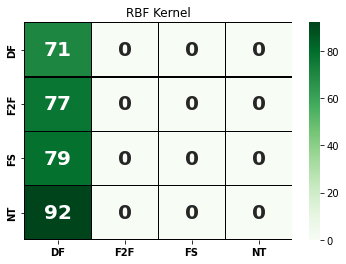

In [7]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy/5*100) + " %")
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy/5*100) + " %")

poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('F1 score (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('F1 score (RBF Kernel): ', "%.2f" % (rbf_f1*100))

print('Confusion Matrix (Polynomial Kernel): \n', confusion_matrix(y_test, poly_pred))
print('Confusion Matrix (RBF Kernel): \n',confusion_matrix(y_test, rbf_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, poly_pred), 'Polynomial Kernel')
print()
visualiseConfusionMatrix(confusion_matrix(y_test, rbf_pred), 'RBF Kernel')


# Random Forest

Importing Libraries

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Define the Classifier

In [9]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)

Predicting Test Set Results

In [10]:
rf_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    rf_accuracy += accuracy_score(y_test, y_pred)
    

Outcomes

Accuracy (Random Forest):  55.16 %
F1 (Random Forest):  53.20
Confustion Matrix (Random Forest):
 [[44  4 20  3]
 [ 2 34  4 37]
 [23  4 51  1]
 [ 2 40  9 41]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

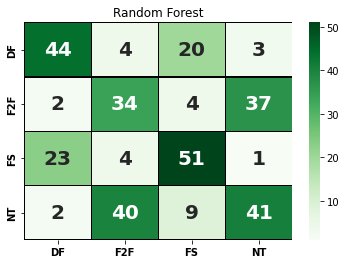

In [11]:
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy/5*100) + " %")
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))
print("Confustion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Random Forest')

# MultiClass Logistic Regression

Import Libraries

In [12]:
from sklearn.linear_model import LogisticRegression

Define Classifier.

In [13]:
classifier = LogisticRegression(multi_class='auto', solver='sag')


Predicting Test Set Results.

In [14]:
lr_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    lr_accuracy += accuracy_score(y_test, y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Outcomes

Accuracy (Logistic Regression):  29.33 %
F1 (Logistic Regression):  31.17
Confusion Matrix (Logistic Regression):
 [[31  6 26  8]
 [ 7 18  8 44]
 [30 11 32  6]
 [ 8 51 14 19]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

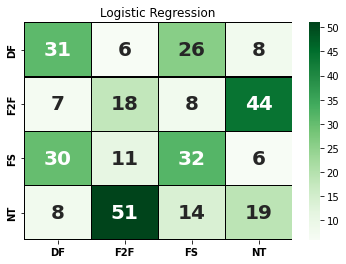

In [15]:
lr_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Logistic Regression): ', "%.2f" % (lr_accuracy/5*100) + " %")
print('F1 (Logistic Regression): ', "%.2f" % (lr_f1*100))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Logistic Regression')

# Decision Tree

Importing Libraries

In [16]:
from sklearn.tree import DecisionTreeClassifier

Define the Classifier

In [17]:
clf = DecisionTreeClassifier()

Predicting Test Set Results

In [18]:
dt_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    dt_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (Decision Tree):  52.22 %
F1 (Decision Tree):  46.71
Confustion Matrix (Decision Tree):
 [[42  6 16  7]
 [ 6 32 12 27]
 [20 11 44  4]
 [14 37  9 32]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

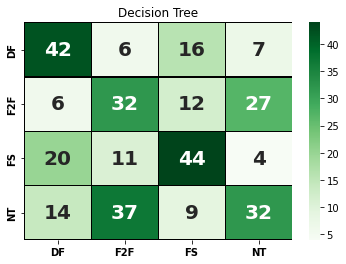

In [19]:
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Decision Tree): ', "%.2f" % (dt_accuracy/5*100) + " %")
print('F1 (Decision Tree): ', "%.2f" % (dt_f1*100))
print("Confustion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'Decision Tree')

# KNN

Importing Libraries

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Define the Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)

Predicting Test Set Results

In [22]:
knn_accuracy = 0

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    knn_accuracy += accuracy_score(y_test, y_pred)

Outcomes

Accuracy (KNN):  41.40 %
F1 (KNN):  39.83
Confustion Matrix (KNN):
 [[46 13 12  0]
 [12 33 11 21]
 [29 15 35  0]
 [11 56  8 17]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

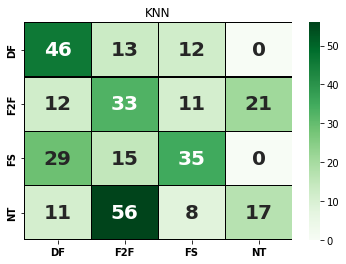

In [23]:
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (KNN): ', "%.2f" % (knn_accuracy/5*100) + " %")
print('F1 (KNN): ', "%.2f" % (knn_f1*100))
print("Confustion Matrix (KNN):\n", confusion_matrix(y_test, y_pred))
visualiseConfusionMatrix(confusion_matrix(y_test, y_pred), 'KNN')